# 📺 광고 매체에 따른 판매량 예측

### 📥 라이브러리 준비

<Axes: >

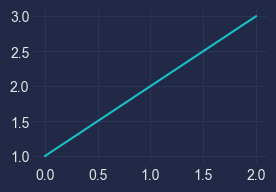

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
pd.Series([1, 2, 3]).plot(figsize=(3, 2))

### 📚 데이터 불러오기

In [4]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('./data/advertising.csv')
display(df.head())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 🔍 데이터 이해하기

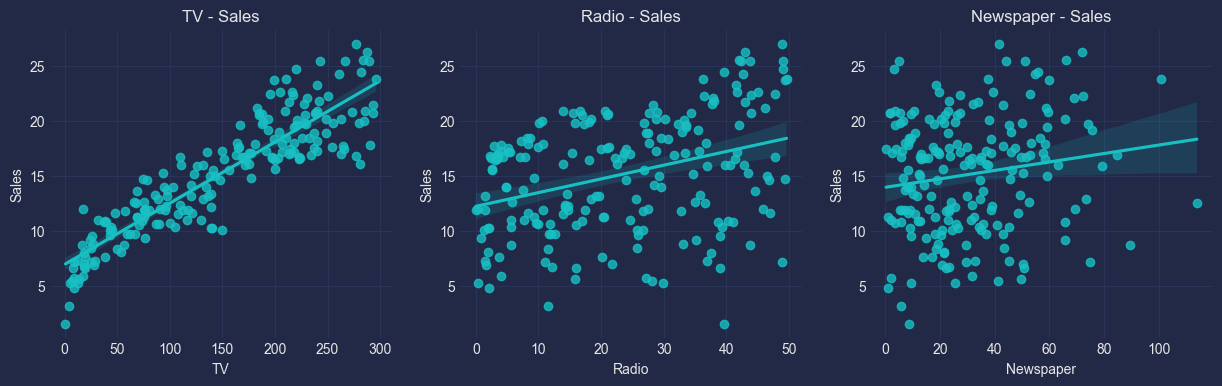

In [8]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title('TV - Sales')
sns.regplot(data=df, x='TV', y='Sales')

plt.subplot(1, 3, 2)
plt.title('Radio - Sales')
sns.regplot(data=df, x='Radio', y='Sales')

plt.subplot(1, 3, 3)
plt.title('Newspaper - Sales')
sns.regplot(data=df, x='Newspaper', y='Sales')

plt.show()
# .ipynb 커널에서는 plt가 항상 자동으로 표시됩니다. 
# 15번 줄은 수동으로 표시하는 함수라서 .py 파일 내에서는 필요할 수 있지만 여기서는 생략해도 됩니다.
# 15번 줄을 없애면 마지막 13번 줄의 출력이 텍스트로 추가로 표시되기 때문에 못생겨집니다.
# 이 문제는 15번 줄을 `pass`로 대체하면 해결됩니다.

#### 🧲 상관계수

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000
